In [176]:
import matplotlib.pyplot as plt
import platform



In [177]:
import pandas as pd
Wdf=pd.read_csv('대구_utf8.csv')
Wdf

,날짜,지점,평균기온,최저기온,최고기온
0,1909-01-01,143,-4.1,-8.0,0.1
1,1909-01-02,143,-0.8,-6.7,6.1
2,1909-01-03,143,1.0,-2.4,3.6
3,1909-01-04,143,4.2,0.0,9.2
4,1909-01-05,143,3.4,-0.4,9.0
...,...,...,...,...,...
41445,2022-06-26,143,28.4,24.4,32.8
41446,2022-06-27,143,27.3,25.4,30.1
41447,2022-06-28,143,28.9,24.8,32.3
41448,2022-06-29,143,29.5,27.7,33.7


In [178]:
startYear=int(input('시작연도를 입력하세요: '))

시작연도를 입력하세요: 2010


In [179]:
finishYear=int(input('마지막 연도를 입력하세요: '))

마지막 연도를 입력하세요: 2015


In [180]:
cMonth=int(input('기온 변화를 측정할 달을 입력하세요: '))

기온 변화를 측정할 달을 입력하세요: 6


In [181]:
Wdf['날짜']=pd.to_datetime(Wdf['날짜'], format='%Y-%m-%d')
Wdf['날짜'].dtype

dtype('<M8[ns]')

In [182]:
Wdf['Y']=Wdf['날짜'].dt.year
Wdf['M']=Wdf['날짜'].dt.month

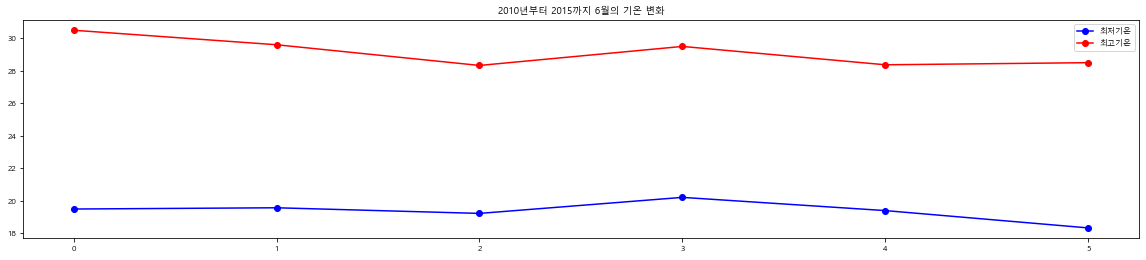

In [183]:
Wdf=Wdf[(Wdf['날짜'].dt.year>=startYear) & (Wdf['날짜'].dt.year<=finishYear) & (Wdf['날짜'].dt.month == cMonth)]
Wdf
monthGroup=Wdf.groupby(by='Y').mean()
monthGroup[['최저기온', '최고기온']]
L=monthGroup['최저기온'].to_list()
H=monthGroup['최고기온'].to_list()

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic', size=8)
else:
    plt.rc('font', family='AppleGothic', size=8)

plt.figure(figsize=(20,4))
plt.plot(L, 'blue', marker='o', label='최저기온')
plt.plot(H, 'red', marker='o', label='최고기온')
plt.legend()
plt.title('{}년부터 {}까지 {}월의 기온 변화'.format(startYear, finishYear, cMonth))
plt.show()
